## 1.0 Trench migration rate (Vt) dipendency from oceanic plate velocity (Vp) in a deep Earth interior problems with a sub-lithospheric layer¶

![alt](../img/SLL3D.png) 

## Goals:

    An example of basic linear regression plots with a number of Python libraries and tools
    


In [9]:
# Import Libraries
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import math
#import h5py
import matplotlib.pyplot as plt
import os
import matplotlib.lines as mlines
import itertools# Import libraries
import math
from scipy import stats
from scipy.stats import pearsonr  
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression

In [10]:
# Initialise variables
Vpmag        = np.array([2.5025651501496613,3.6241665283346278, 4.5125663357343422, 5.3561187289356731, 6.4611815337388379])
Vt           = np.array([-0.92865887,  -0.78003195, -0.15118985, 0.3911321 ,  0.99889706 ])
subpart      = (Vt)/ (Vpmag )
Wstar        = np.array([0,0.25,0.5,0.75,1,])
x            = Wstar
y            = subpart

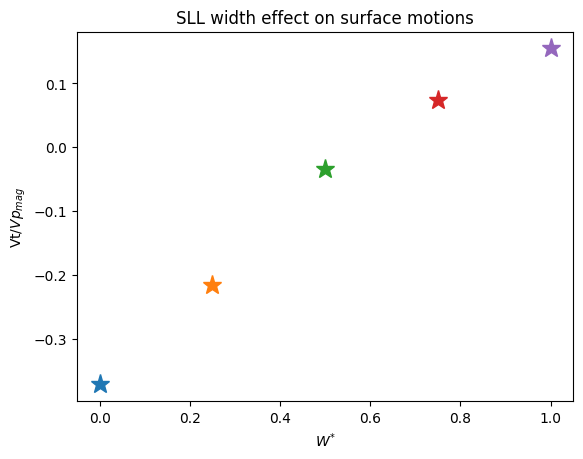

In [14]:
# Visualise the data
for item in range (len(Wstar)):
    plt.plot(Wstar[item],subpart[item], marker="*",markersize=14,) 
# Set the title
plt.title("SLL width effect on surface motions")
# Set the y-axis label
plt.ylabel('Vt/$Vp_{mag}$')
# Set the x-axis label
plt.xlabel('$W^{*}$')
plt.show()

# Linear Regression with Scikit-learn

coefficient of determination: 0.9773362158610686
intercept: [-0.34636275]
slope: [[0.53584844]]
Predicted response:
[[-0.34636275]
 [-0.21240064]
 [-0.07843853]
 [ 0.05552358]
 [ 0.18948569]]


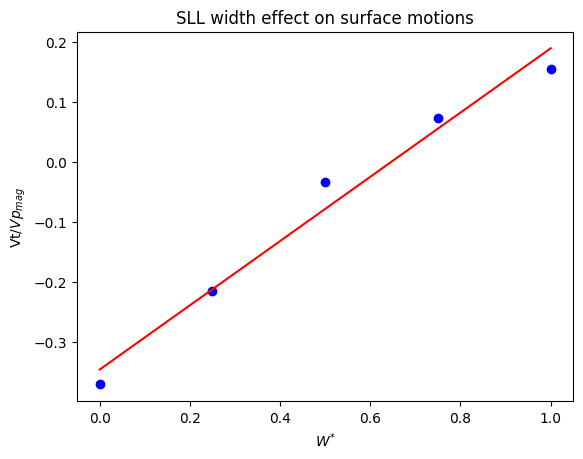

In [16]:
lin = LinearRegression()
x   =  np.array(x).reshape(-1,1)
y   =  np.array(y).reshape(-1,1)
lin.fit(x, y)
r_sq = lin.score(x, y)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', lin.intercept_)

# Print the Slope:
print('slope:', lin.coef_) 

# Predict a Response and print it:
y_pred = lin.predict(x)
print('Predicted response:', y_pred, sep='\n')
plt.scatter(x, y, color = 'blue')
# Set the title
plt.title("SLL width effect on surface motions")
# Set the y-axis label
plt.ylabel('Vt/$Vp_{mag}$')
# Set the x-axis label
plt.xlabel('$W^{*}$')
plt.plot(x, lin.predict(x), color = 'red')

# Linear Regression with Scipy

y = 0.53585 * x + -0.34636


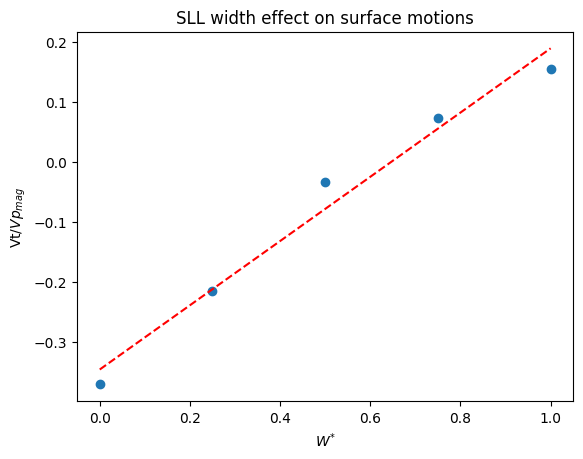

In [17]:
# define the true objective function - you can test different functions here
def objective(x, a, b):
    return a * x + b
 
xm      = Wstar
ym      = subpart
# choose the input and output variables
x, y    = xm, ym
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b    = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line  = xm
# calculate the output for the range
y_line  = objective(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
# Set the title
plt.title("SLL width effect on surface motions")
# Set the y-axis label
plt.ylabel('Vt/$Vp_{mag}$')
# Set the x-axis label
plt.xlabel('$W^{*}$')
plt.show()

# Linear Regression with Numpy Polyfit function

In [18]:
# Define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs  = np.polyfit(x, y, degree)
    p       = np.poly1d(coeffs)
    
    #calculate r-squared
    yhat    = p(x)
    ybar    = np.sum(y)/len(y)
    ssreg   = np.sum((yhat-ybar)**2)
    sstot   = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

#E. g., for finding the r-squared of polynomial model with degree = 3, appy as below
#polyfit(xm, ym, 3)

{'r_squared': 0.977336215861069}
PearsonRResult(statistic=0.9886031639950726, pvalue=0.0014580300494141803)
Our function will loook like this: y= 0.5358484369708908 * x + -0.34636274949898255


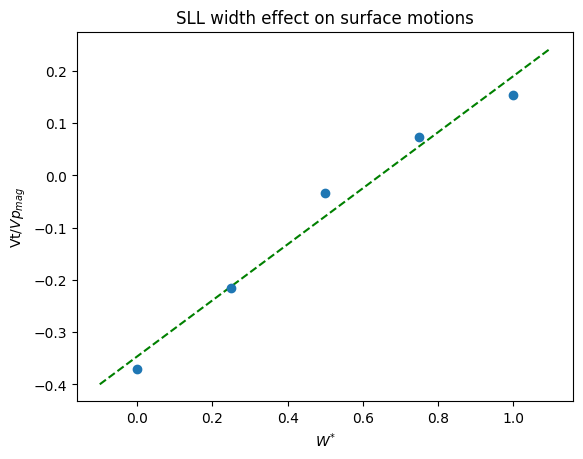

In [19]:
# Apply linear regression to our initial data
mymodel = np.poly1d(np.polyfit(x, y, 1))
myline  =  np.arange(-0.1, 1.1, 0.01)

plt.plot(myline, mymodel(myline), color="green" ,linestyle = 'dashed',)
plt.plot(x, y, 'o')
plt.xlabel('Age')
plt.ylabel('Length')
print(polyfit(x, y, 1))
print(pearsonr(x, y))
pol   = np.poly1d(mymodel)
print(f"Our function will loook like this: y= {pol.coeffs[0]} * x + {pol.coeffs[1]}")
# Set the title
plt.title("SLL width effect on surface motions")
# Set the y-axis label
plt.ylabel('Vt/$Vp_{mag}$')
# Set the x-axis label
plt.xlabel('$W^{*}$')
plt.show()

## The same result can be achieved by using several Python libraries and tools 

In [20]:
print(f'f(x) predicted with Scipy:    y = {a}  * x {b}')
print(f'f(x) predicted with Numpy:    y = {pol.coeffs[0]}  * x {pol.coeffs[1]}')
print(f'f(x) predicted with Sklearn:  y = {lin.coef_[0,0]}  * x { lin.intercept_[0]}')

f(x) predicted with Scipy:    y = 0.5358484369698788  * x -0.3463627495019197
f(x) predicted with Numpy:    y = 0.5358484369708908  * x -0.34636274949898255
f(x) predicted with Sklearn:  y = 0.5358484369708908  * x -0.3463627494989827
